# Setup Environment

In [1]:
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import scipy.stats as stats
import statsmodels.api as sm

2024-10-06 20:30:41.903643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-06 20:30:42.014896: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 20:30:42.597371: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-10-06 20:30:42.597428: W tensorflow/

In [2]:
print(tf.__version__)

2.11.1


# Import Data

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Prep Data

In [4]:
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


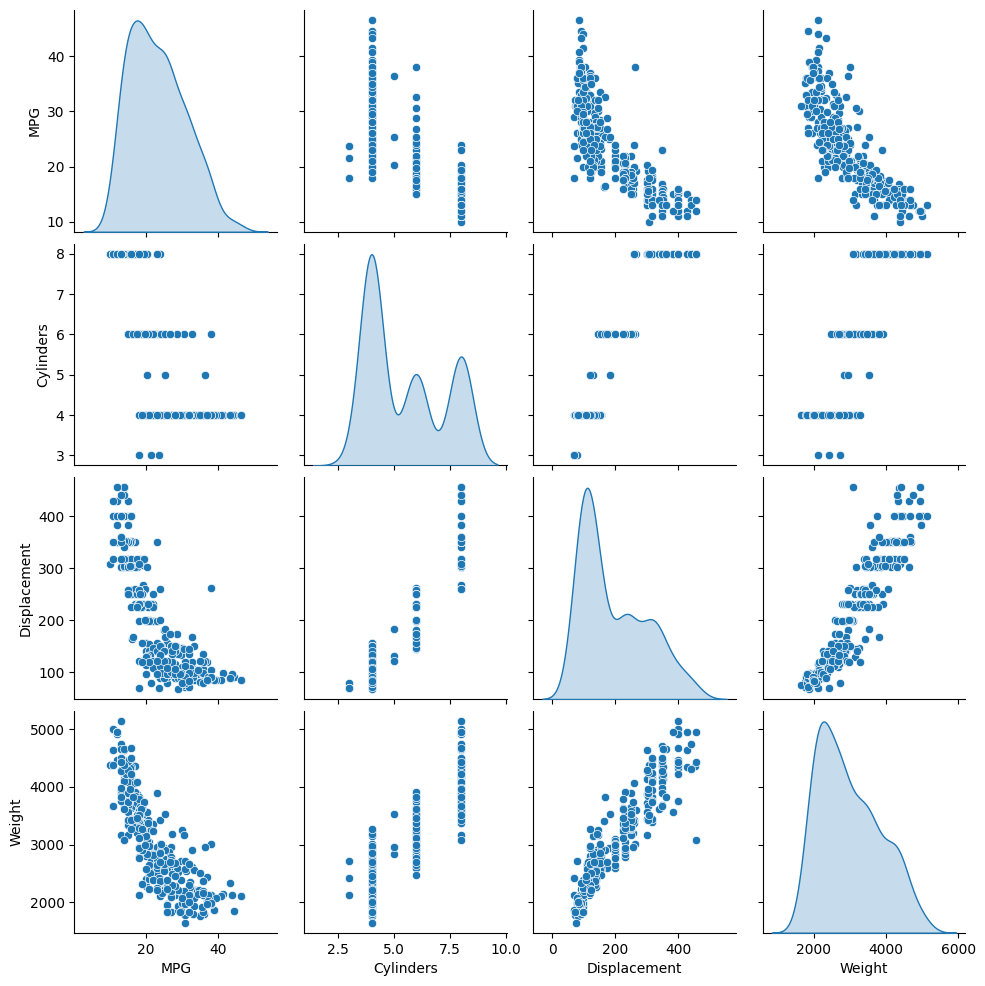

In [5]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde");

In [6]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()

In [7]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')  

# Review Statistics

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [9]:
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.0,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.0,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.2,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.0,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.0,3.0


# Build Model

In [10]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'), layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model    

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
2024-10-06 20:30:46.820191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-10-06 20:30:46.8

In [12]:
untrained_sample = train_dataset.sample(10)
model.predict(untrained_sample)

1/1 [==============================] - 0s 116ms/step


array([[-149.22298],
       [-298.7572 ],
       [-334.97906],
       [-205.91492],
       [-269.4626 ],
       [-183.85515],
       [-137.7262 ],
       [-297.97925],
       [-222.9282 ],
       [-161.18234]], dtype=float32)

# Train Model

In [13]:
model = build_model()
EPOCHS = 1000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
early_history = model.fit(
    normed_train_data, 
    train_labels,
    epochs = EPOCHS, 
    validation_split = 0.2, 
    verbose = 0,
    callbacks = [early_stop, tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:564.9245,  mae:22.5168,  mse:564.9245,  val_loss:559.1095,  val_mae:22.3325,  val_mse:559.1095,  
....................................................................................................
Epoch: 100, loss:6.6055,  mae:1.7784,  mse:6.6055,  val_loss:9.3074,  val_mae:2.3180,  val_mse:9.3074,  
.....

# Examining Results

In [14]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
100,6.605520,1.778440,6.605520,9.307402,2.317958,9.307402,100
101,6.376406,1.787917,6.376406,9.232430,2.356156,9.232430,101
102,6.448185,1.752162,6.448185,9.213274,2.239199,9.213274,102
103,6.225513,1.752658,6.225513,9.802158,2.233472,9.802158,103
104,6.222548,1.755399,6.222548,9.429350,2.392914,9.429350,104


Text(0, 0.5, 'MAE [MPG]')

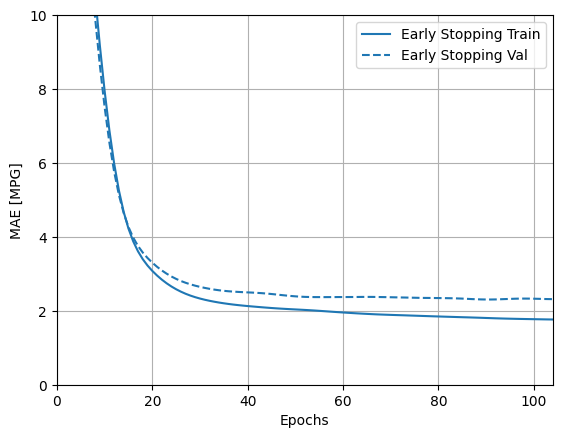

In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]') 

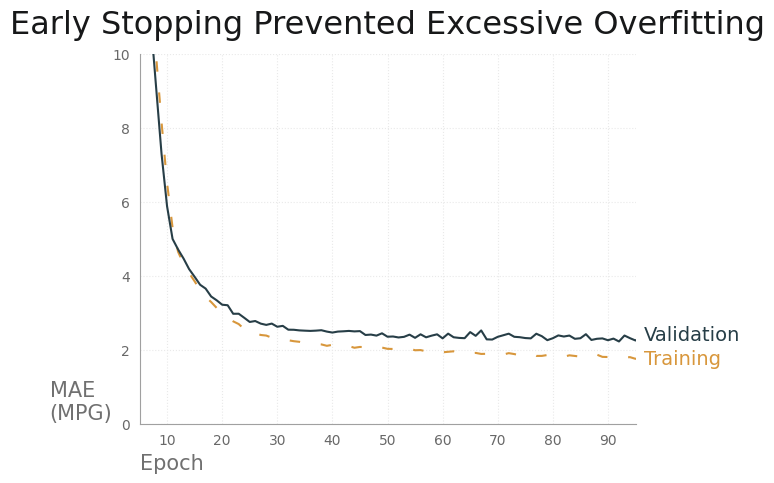

In [16]:
fig, ax = plt.subplots()
plt.grid(which = 'major', axis = 'both', linestyle = ':', color = '#e9e9e9')
plt.plot(hist['epoch'], hist['mae'], color = '#D8973C', linestyle = (0, (5, 10)))
plt.plot(hist['epoch'], hist['val_mae'], color = '#273E47')
ax.set_xlim([5, 95])
ax.set_ylim([0, 10])
ax.set_xlabel('Epoch', fontsize = 15, 
			  loc = 'left').set_color('#707070')
ax.set_ylabel('MAE\n(MPG)', fontsize = 15, rotation = 'horizontal',
			  loc = 'bottom', labelpad = 45).set_color('#707070')
ax.set_title('Early Stopping Prevented Excessive Overfitting', fontsize = 23, pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis='y', which='both', right=False,
			   left=False, colors = '#686868')
ax.tick_params(axis='x', which='both', top=False,
			   bottom=False, colors = '#686868')

for line, name in zip(ax.lines, ['Training', 'Validation']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color = line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords = "offset points",
                size = 14, va = "center")

plt.show();

# Test Analysis

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose = 2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))  

3/3 - 0s - loss: 6.7726 - mae: 1.9416 - mse: 6.7726 - 21ms/epoch - 7ms/step
Testing set Mean Abs Error:  1.94 MPG


# Prediction

3/3 [==============================] - 0s 1ms/step


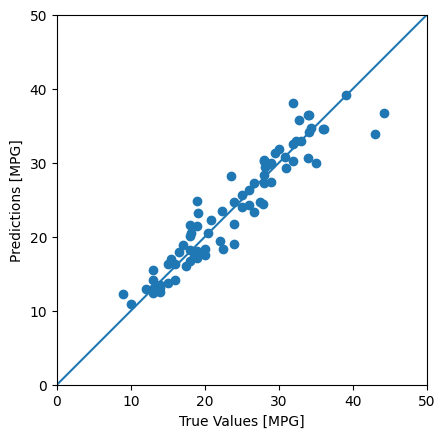

In [18]:
test_predictions = model.predict(normed_test_data).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)   

In [35]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64

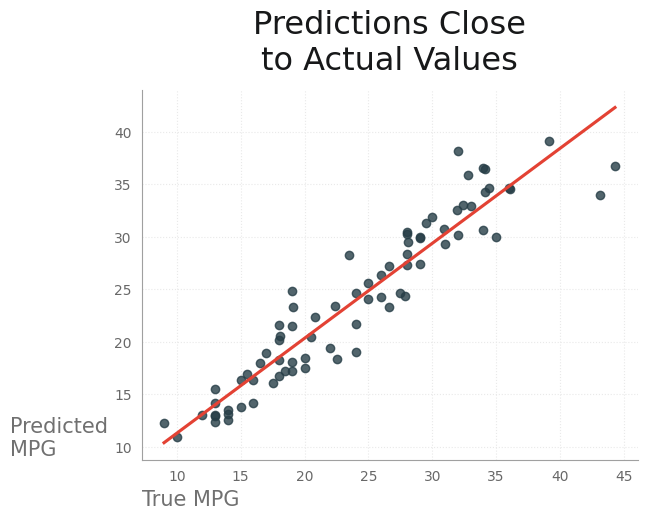

In [41]:
fig, ax = plt.subplots()
plt.grid(which = 'major', axis = 'both', linestyle = ':', color = '#e9e9e9')
sns.regplot(x = test_labels, y = test_predictions, ci = False, color = '#273E47', line_kws = {'color':'#E34234'})
xlim = ax.get_xlim()
ax.set_axisbelow(True)
ax.set_xlabel('True MPG', fontsize = 15, loc =
				'left').set_color('#707070')
ax.set_ylabel('Predicted\nMPG', fontsize = 15, rotation =
				'horizontal', loc = 'bottom', labelpad =
				75).set_color('#707070')
ax.set_title('Predictions Close\nto Actual Values', fontsize = 23, pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis='y', which='both', right=False,
				left=False, colors = '#686868')
ax.tick_params(axis='x', which='both', top=False,
				bottom=False, colors = '#686868')
plt.show()

# Normality of Error Distribution

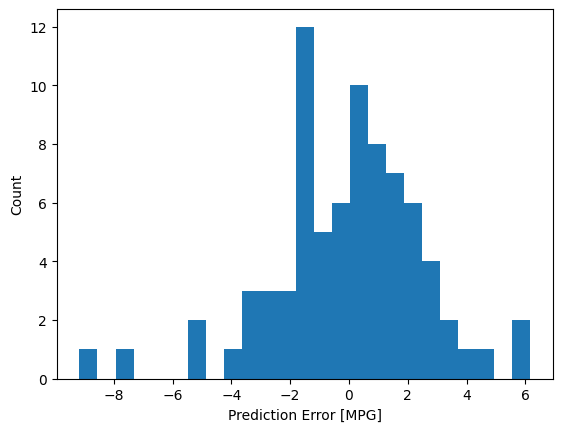

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

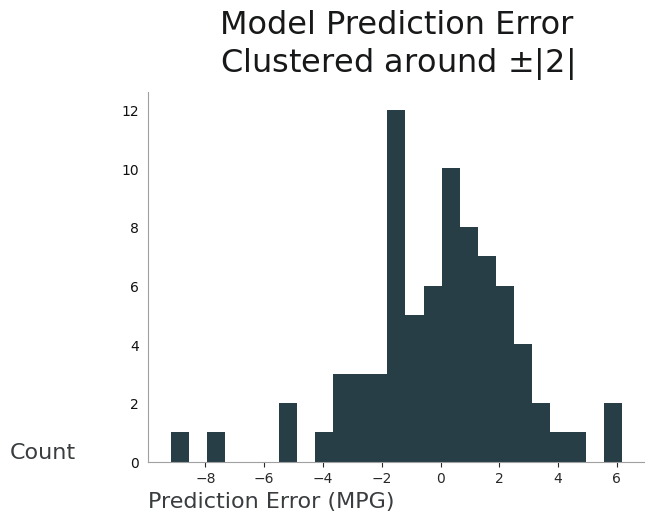

In [28]:
fig, ax = plt.subplots()
plt.hist(error, bins = 25, color = '#273E47')
ax.set_title('Model Prediction Error\nClustered around $\pm$|2|', fontsize = 23, pad = 15).set_color('#171819')
ax.tick_params(axis = 'y', which = 'both', right = False,
				left = False, colors = '#101010')
# https://www.tutorialspoint.com/how-to-remove-a-frame-without-removing-the-axes-tick-labels-from-a-matplotlib-figure-in-python
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis = 'x', colors = '#282828')
ax.set_xlabel('Prediction Error (MPG)', fontsize = 16, loc = 'left').set_color('#393d3f')
ax.set_ylabel('Count', fontsize = 16, rotation = 'horizontal', loc = 'bottom', labelpad = 80).set_color('#393d3f')
plt.show();

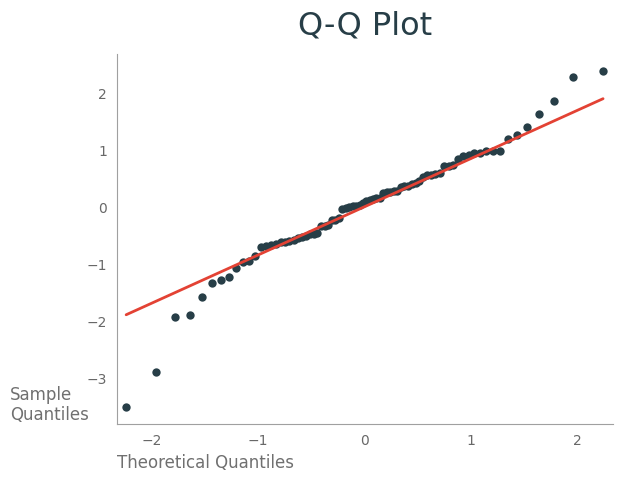

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig = sm.qqplot(error, dist = stats.norm, fit = True, line = 'q', ax = ax)
ax.set_title('Q-Q Plot', fontsize = 23, pad = 15).set_color('#273E47')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.get_lines()[0].set_markerfacecolor('#273E47')
ax.get_lines()[0].set_markeredgewidth(0)
ax.get_lines()[1].set_color('#e34234')
ax.get_lines()[1].set_linewidth(2)
ax.get_lines()[1].set_solid_capstyle('round')
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis='y', which='both', right=False,
			   left=False, colors = '#686868')
ax.tick_params(axis='x', which='both', top=False, 
			   bottom=False, colors = '#686868')
ax.set_xlabel('Theoretical Quantiles', fontsize = 12, loc =
			  'left').set_color('#707070')
ax.set_ylabel('Sample\nQuantiles', fontsize = 12, rotation =
			  'horizontal', loc = 'bottom', labelpad =
			  55).set_color('#707070')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c4d82d2-b129-4486-baa4-05c502f179ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>